In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt

Make a pipeline that uses all the variables in the Ames dataset, and then fits Ridge Regression with 
.

Cross-validate this pipeline and compare the results to the ordinary linear regression.

Then fit the model on the whole dataset and get the coefficients. Make a plot of these coefficients compared to the ones from ordinary linear regression.

In [ ]:
ames = pd.read_csv("C:/Users/Luke Maier/Downloads/AmesHousing.csv")

clean = ames.isna().sum() < 100
ames = ames.loc[:,clean]

ames.info()

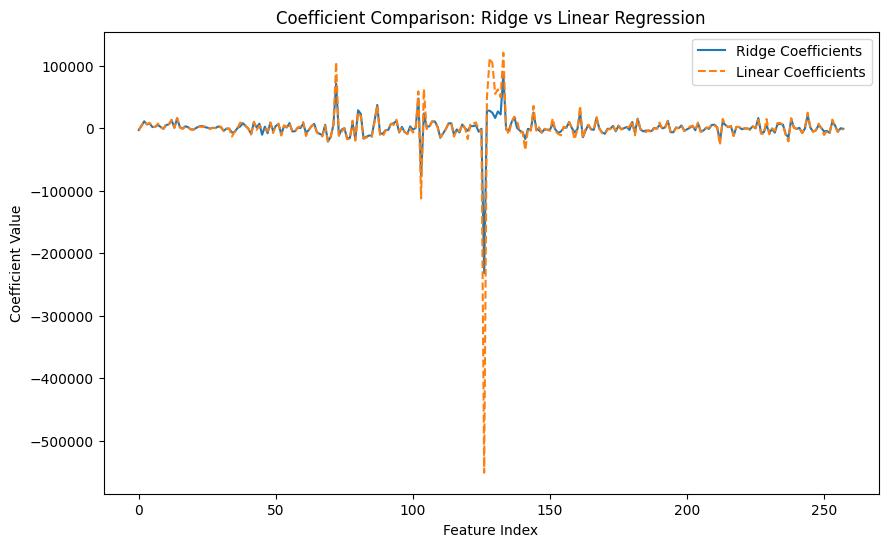

In [8]:
X = ames.drop(['SalePrice', 'Order', 'PID'], axis = 1)
y = ames['SalePrice']


ridge = Ridge()
lr = LinearRegression()

#create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),            #Replaces missing values with column mean before scaling
            ('scaler', StandardScaler())
        ]), X.select_dtypes(include=['float64', 'int64']).columns),     #dynamically selects columns based on data type // avoids column name mismatch errors
        
        ('cat', Pipeline([ 
            ('imputer', SimpleImputer(strategy='most_frequent')),       #Fills missing categorical values with most frequent value before OneHot encoding
            ('onehot', OneHotEncoder(handle_unknown='ignore'))          
        ]), X.select_dtypes(include=['object']).columns)
    ]
)

#Define pipelines
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', ridge)
])

linear_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('linear', lr)
])

#Cross validate
ridge_cv_scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
linear_cv_scores = cross_val_score(linear_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

#Fit the models on the entire dataset to get coefficients
ridge_pipeline.fit(X, y)
linear_pipeline.fit(X, y)

ridge_coefs = ridge_pipeline.named_steps['ridge'].coef_
linear_coefs = linear_pipeline.named_steps['linear'].coef_



#plot
plt.figure(figsize=(10, 6))
plt.plot(ridge_coefs, label='Ridge Coefficients')
plt.plot(linear_coefs, label='Linear Coefficients', linestyle='--')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Comparison: Ridge vs Linear Regression')
plt.legend()
plt.show()

Using the same pipeline as previously, perform tuning on

You should always try 
 values on a log scale; that is, don’t use [1,2,3,4]; instead use something like [0.001, 0.01, 0.1, 1, 10]

In [9]:
lambda_vals = [0.001, 0.01, 0.1, 1, 10]

lambdas = {'ridge__alpha': lambda_vals}

gscv = GridSearchCV(ridge_pipeline, lambdas, cv=5, scoring='r2')
gscv.fit(X, y)

best_lambda = gscv.best_params_['ridge__alpha']
best_score = gscv.best_score_

print(f"Best lambda: {best_lambda}")
print(f"Best R-squared: {best_score}")

Best lambda: 10
Best R-squared: 0.8688389914216164


Create a LASSO pipeline, and tune 
.

Fit your best model on the full Ames data, and compare the coefficients to Ridge and OLS

In [10]:
lasso = Lasso()

lasso_pipeline = Pipeline([
    ("preprocessor",preprocessor),
    ("lasso", lasso)
])


In [14]:
lambda_vals2 = [0.001, 0.01, 0.1, 1, 10]

lambdas2 = {'lasso__alpha': lambda_vals2}

gscv = GridSearchCV(lasso_pipeline, lambdas2, cv=5, scoring='r2')
gscv.fit(X, y)

best_lambda2 = gscv.best_params_['lasso__alpha']
best_score2 = gscv.best_score_

print(f"Best lambda: {best_lambda2}")
print(f"Best R-squared: {best_score2}")

c:\Users\Luke Maier\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233201821902.95654, tolerance: 1413601571.5520763
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Luke Maier\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253279954634.27417, tolerance: 1533825143.5418239
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Luke Maier\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289355521497.5831, tolerance: 1526703256.6343868
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Luke Maier\anaconda3\lib\site-packages\sklearn\linear_model

Best lambda: 10
Best R-squared: 0.8680621439585433


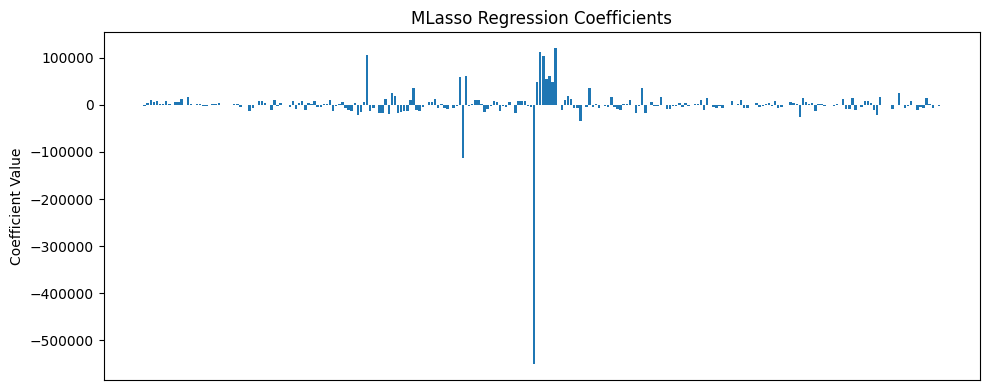

In [17]:
lasso_cv_scores = cross_val_score(lasso_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

lasso_pipeline.fit(X, y)

lasso_coefs = linear_pipeline.named_steps['linear'].coef_

plt.figure(figsize=(10, 4))
plt.bar(range(len(lasso_coefs)), lasso_coefs)
plt.title('MLasso Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.xticks([])
plt.tight_layout()
plt.show()

Create an Elastic Net pipeline, and tune and Fit your best model on the full Ames data, and compare the coefficients to Ridge and OLS.

In [25]:
elastic_pipeline = Pipeline([
    ("preprocessor",preprocessor),
    ("ElasticNet", ElasticNet(alpha=1, l1_ratio=0.5, max_iter=10000))
])

c:\Users\Luke Maier\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6677063044481.801, tolerance: 1413601571.5520763
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Luke Maier\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4667821462071.572, tolerance: 1413601571.5520763
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Luke Maier\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1991231182163.4316, tolerance: 1413601571.5520763
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\Luke Maier\anaconda3\lib\site-packages\sklearn\linear_model\

Best alpha: 100.0
Best L1 ratio: 1.0
Best R-squared: 0.9062396273583916


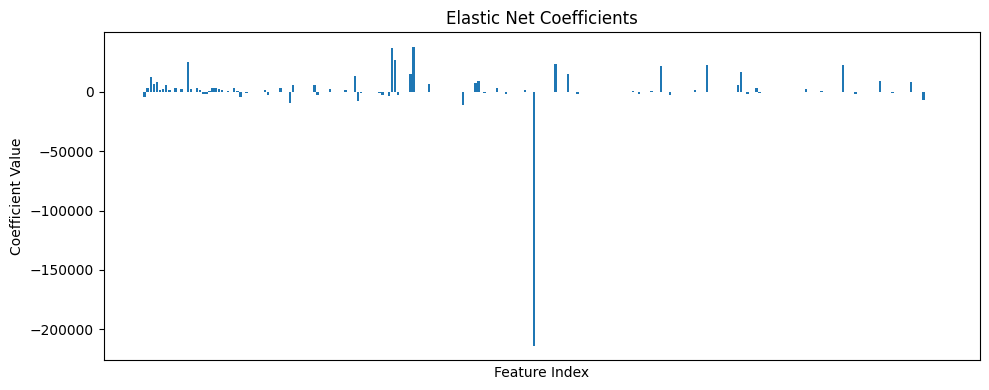

In [38]:
from sklearn.linear_model import ElasticNetCV


elastic_cv = ElasticNetCV(
    alphas=[0.001, 0.01, 0.1, 1, 10, 100],
    l1_ratio=[0.0, 0.25, 0.5, 0.75, 1.0],
    cv=5,
    max_iter=50000, 
    tol=1e-4  # Reduced tolerance
)

#Ensure preprocessing pipeline is correctly applied // convert all categorical variables to numerical
elastic_pipeline = Pipeline([
    ("preprocessor", preprocessor),  # 'preprocessor' should be correctly defined
    ("elastic_cv", elastic_cv)
])

X_transformed = preprocessor.fit_transform(X)

# Fit pipeline with transformed data

elastic_cv.fit(X_transformed, y)
best_alpha = elastic_cv.alpha_
best_l1_ratio = elastic_cv.l1_ratio_
best_score = elastic_cv.score(X_transformed, y)
coef_elastic = elastic_cv.coef_

print(f"Best alpha: {best_alpha}")
print(f"Best L1 ratio: {best_l1_ratio}")
print(f"Best R-squared: {best_score}")

plt.figure(figsize=(10, 4))
plt.bar(range(len(coef_elastic)), coef_elastic)
plt.title("Elastic Net Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.xticks([])
plt.tight_layout()
plt.show()

